# Heart Disease Prediction Using Logistic Regression

# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('framingham.csv')
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

# Analysis of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
# Descriptive statistics
df.describe()





male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4240.000000  4240.000000  4221.000000  4239.000000  3852.000000   
mean    132.354599    82.897759    25.800801    75.878981    81.963655   
std      22.033300    11.910394     4.079840    12.025348    23.954335   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

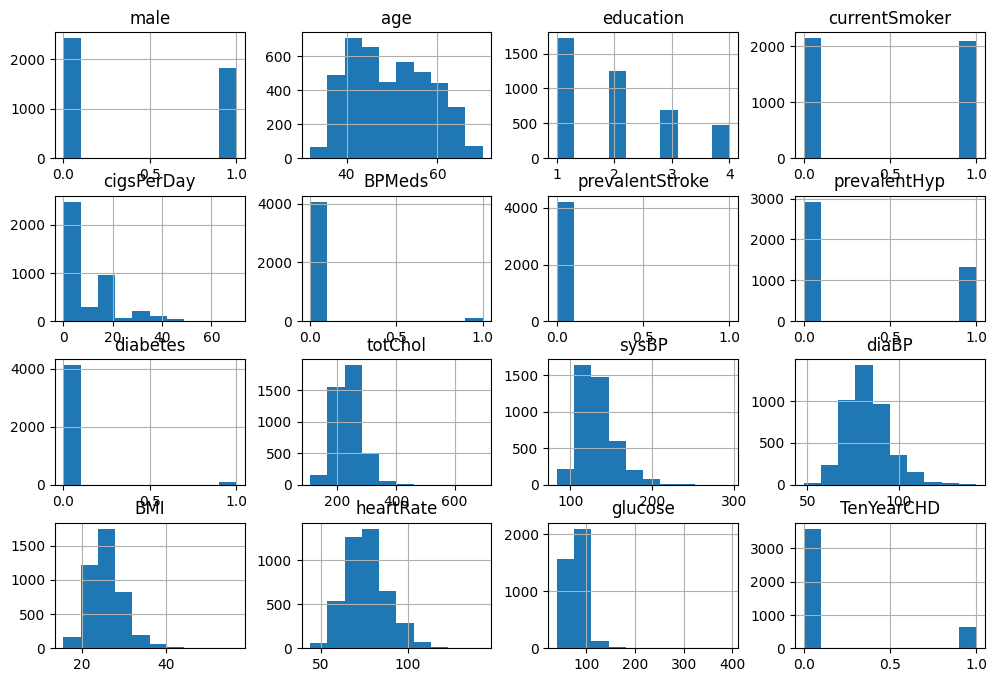

In [6]:
# Histograms of numerical variables
df.hist(figsize=(12, 8))
plt.show()

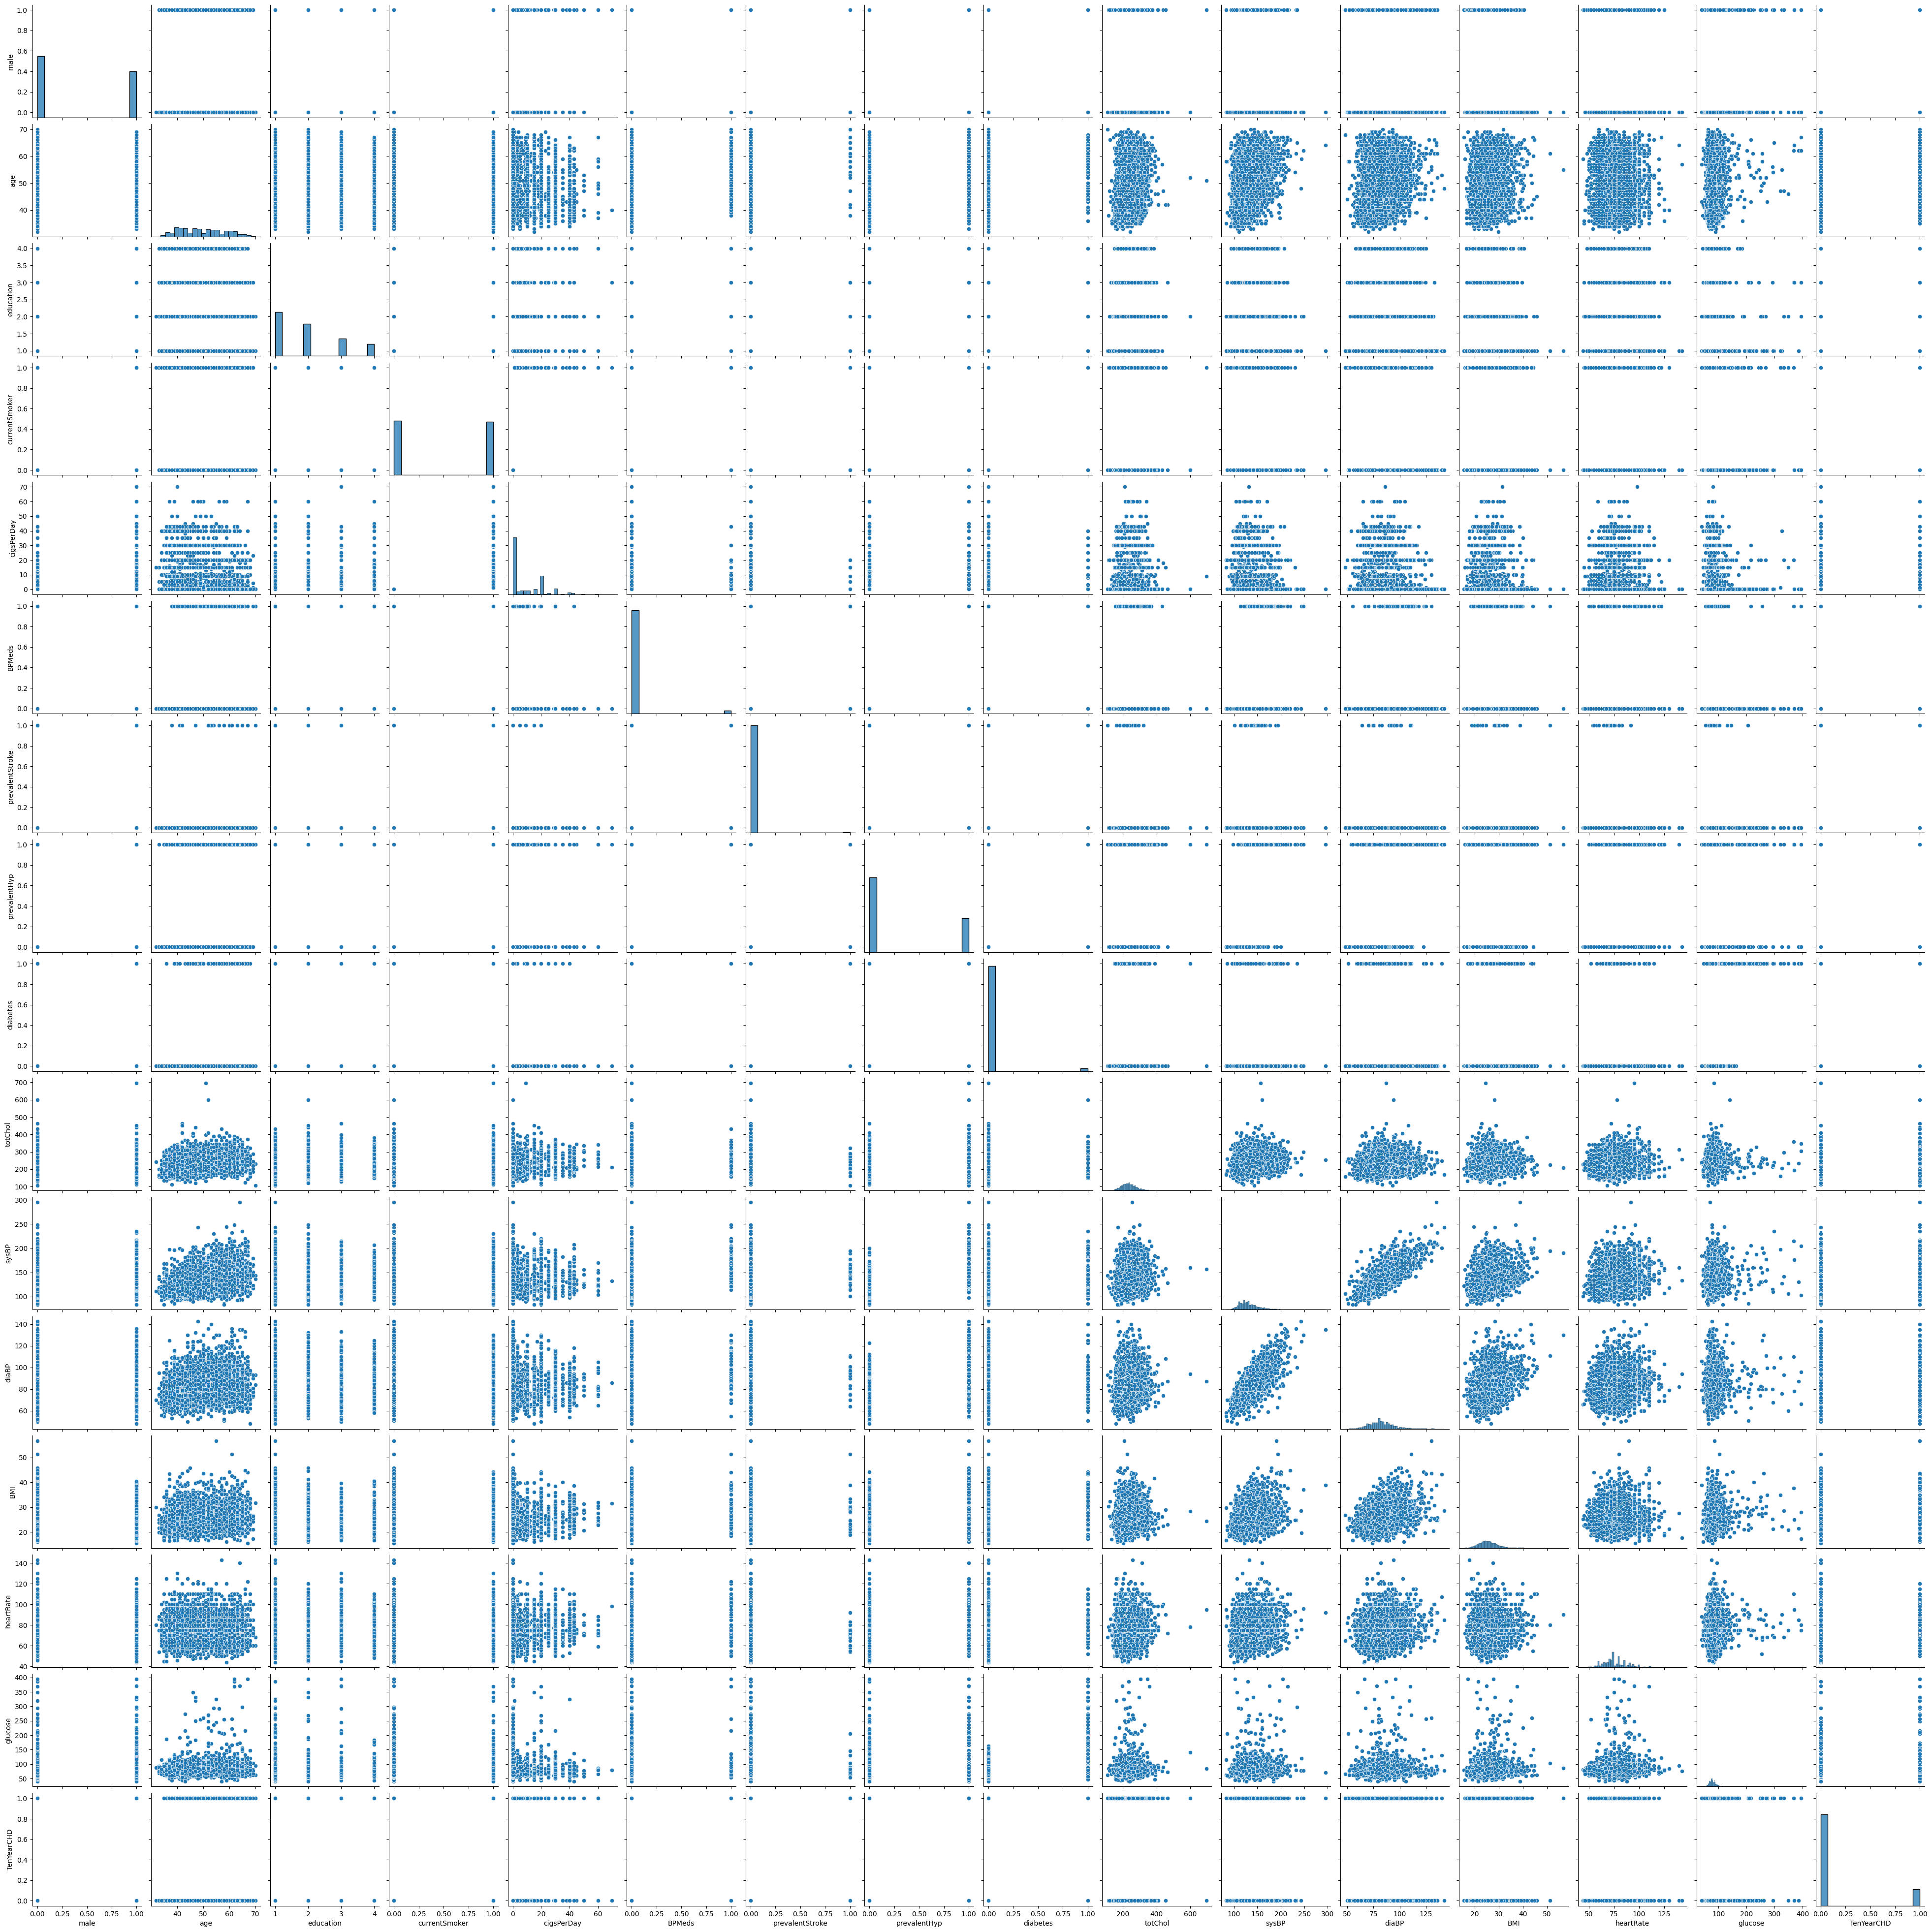

In [7]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df)
plt.show()


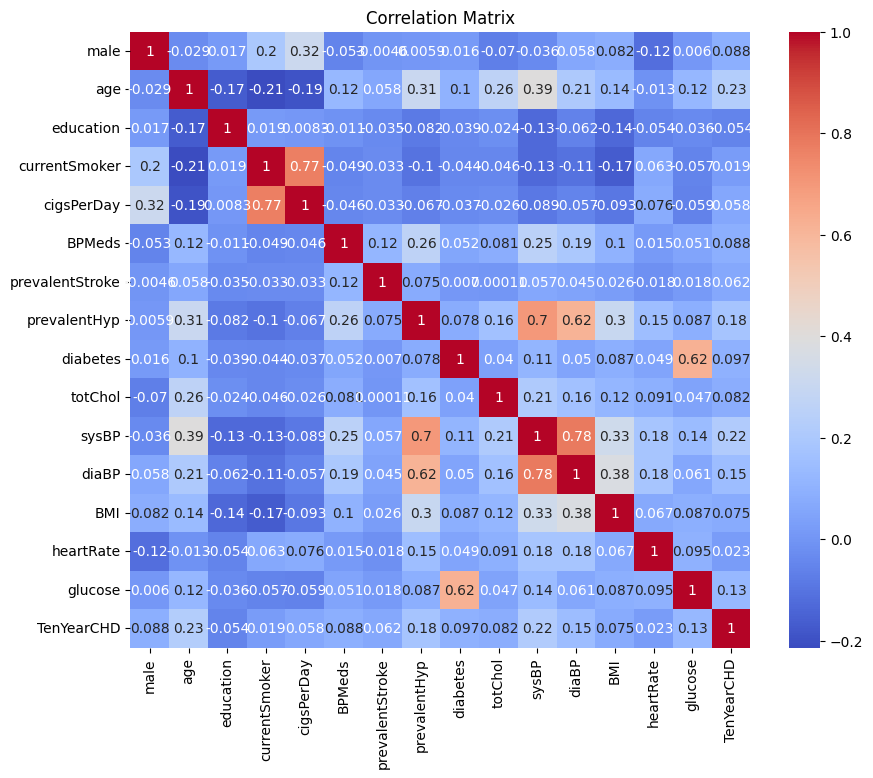

In [8]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


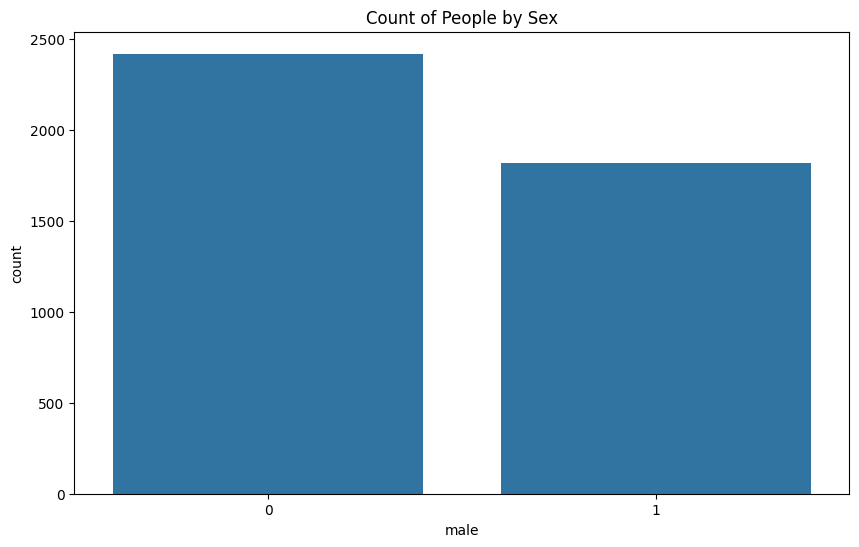

In [9]:
# Countplot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='male', data=df)
plt.title('Count of People by Sex')
plt.show()


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
# print("Missing Values:")



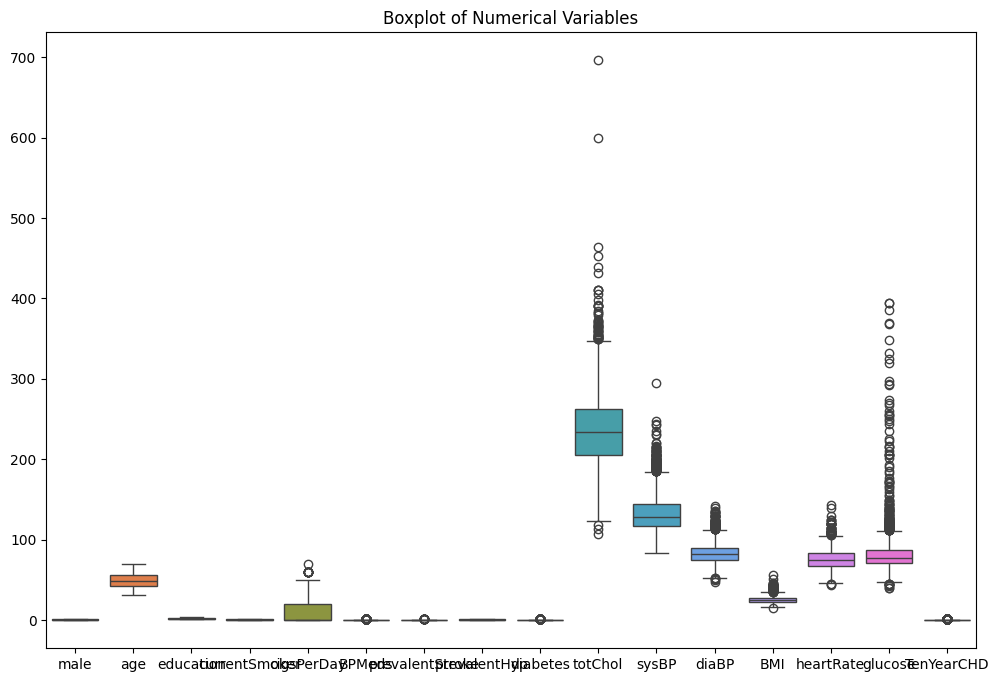

In [11]:
# Boxplot for outlier analysis
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Variables')
plt.show()


# Removing NaN / NULL vales from the data

In [12]:
print(df.isnull().sum())
df.dropna(inplace=True)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


# Data Visualization with Correlation Matrix 

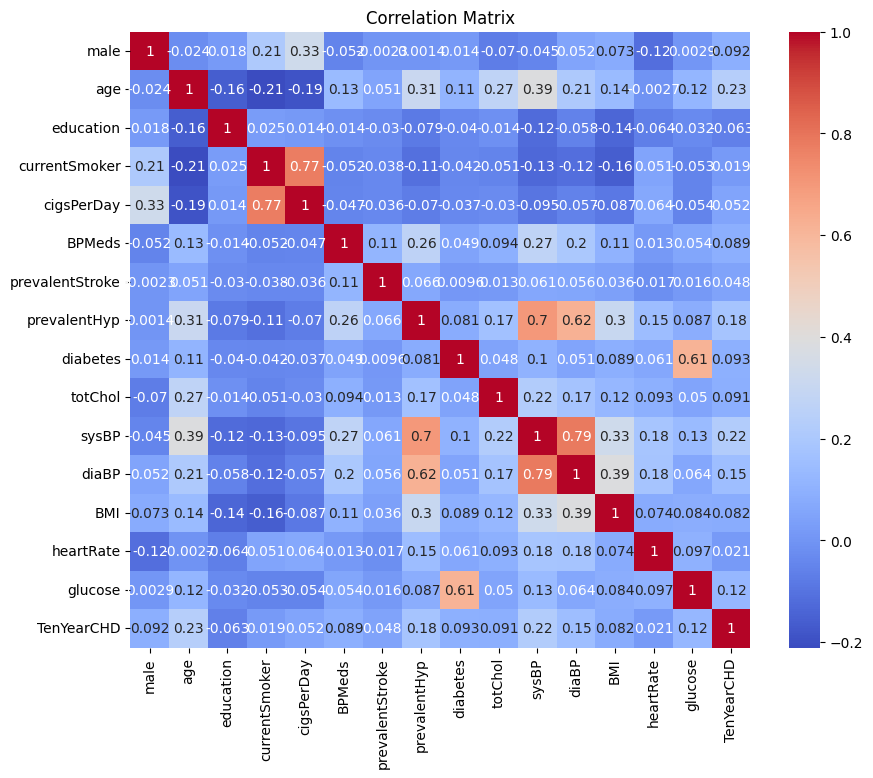

In [13]:
# Data Visualization with Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot

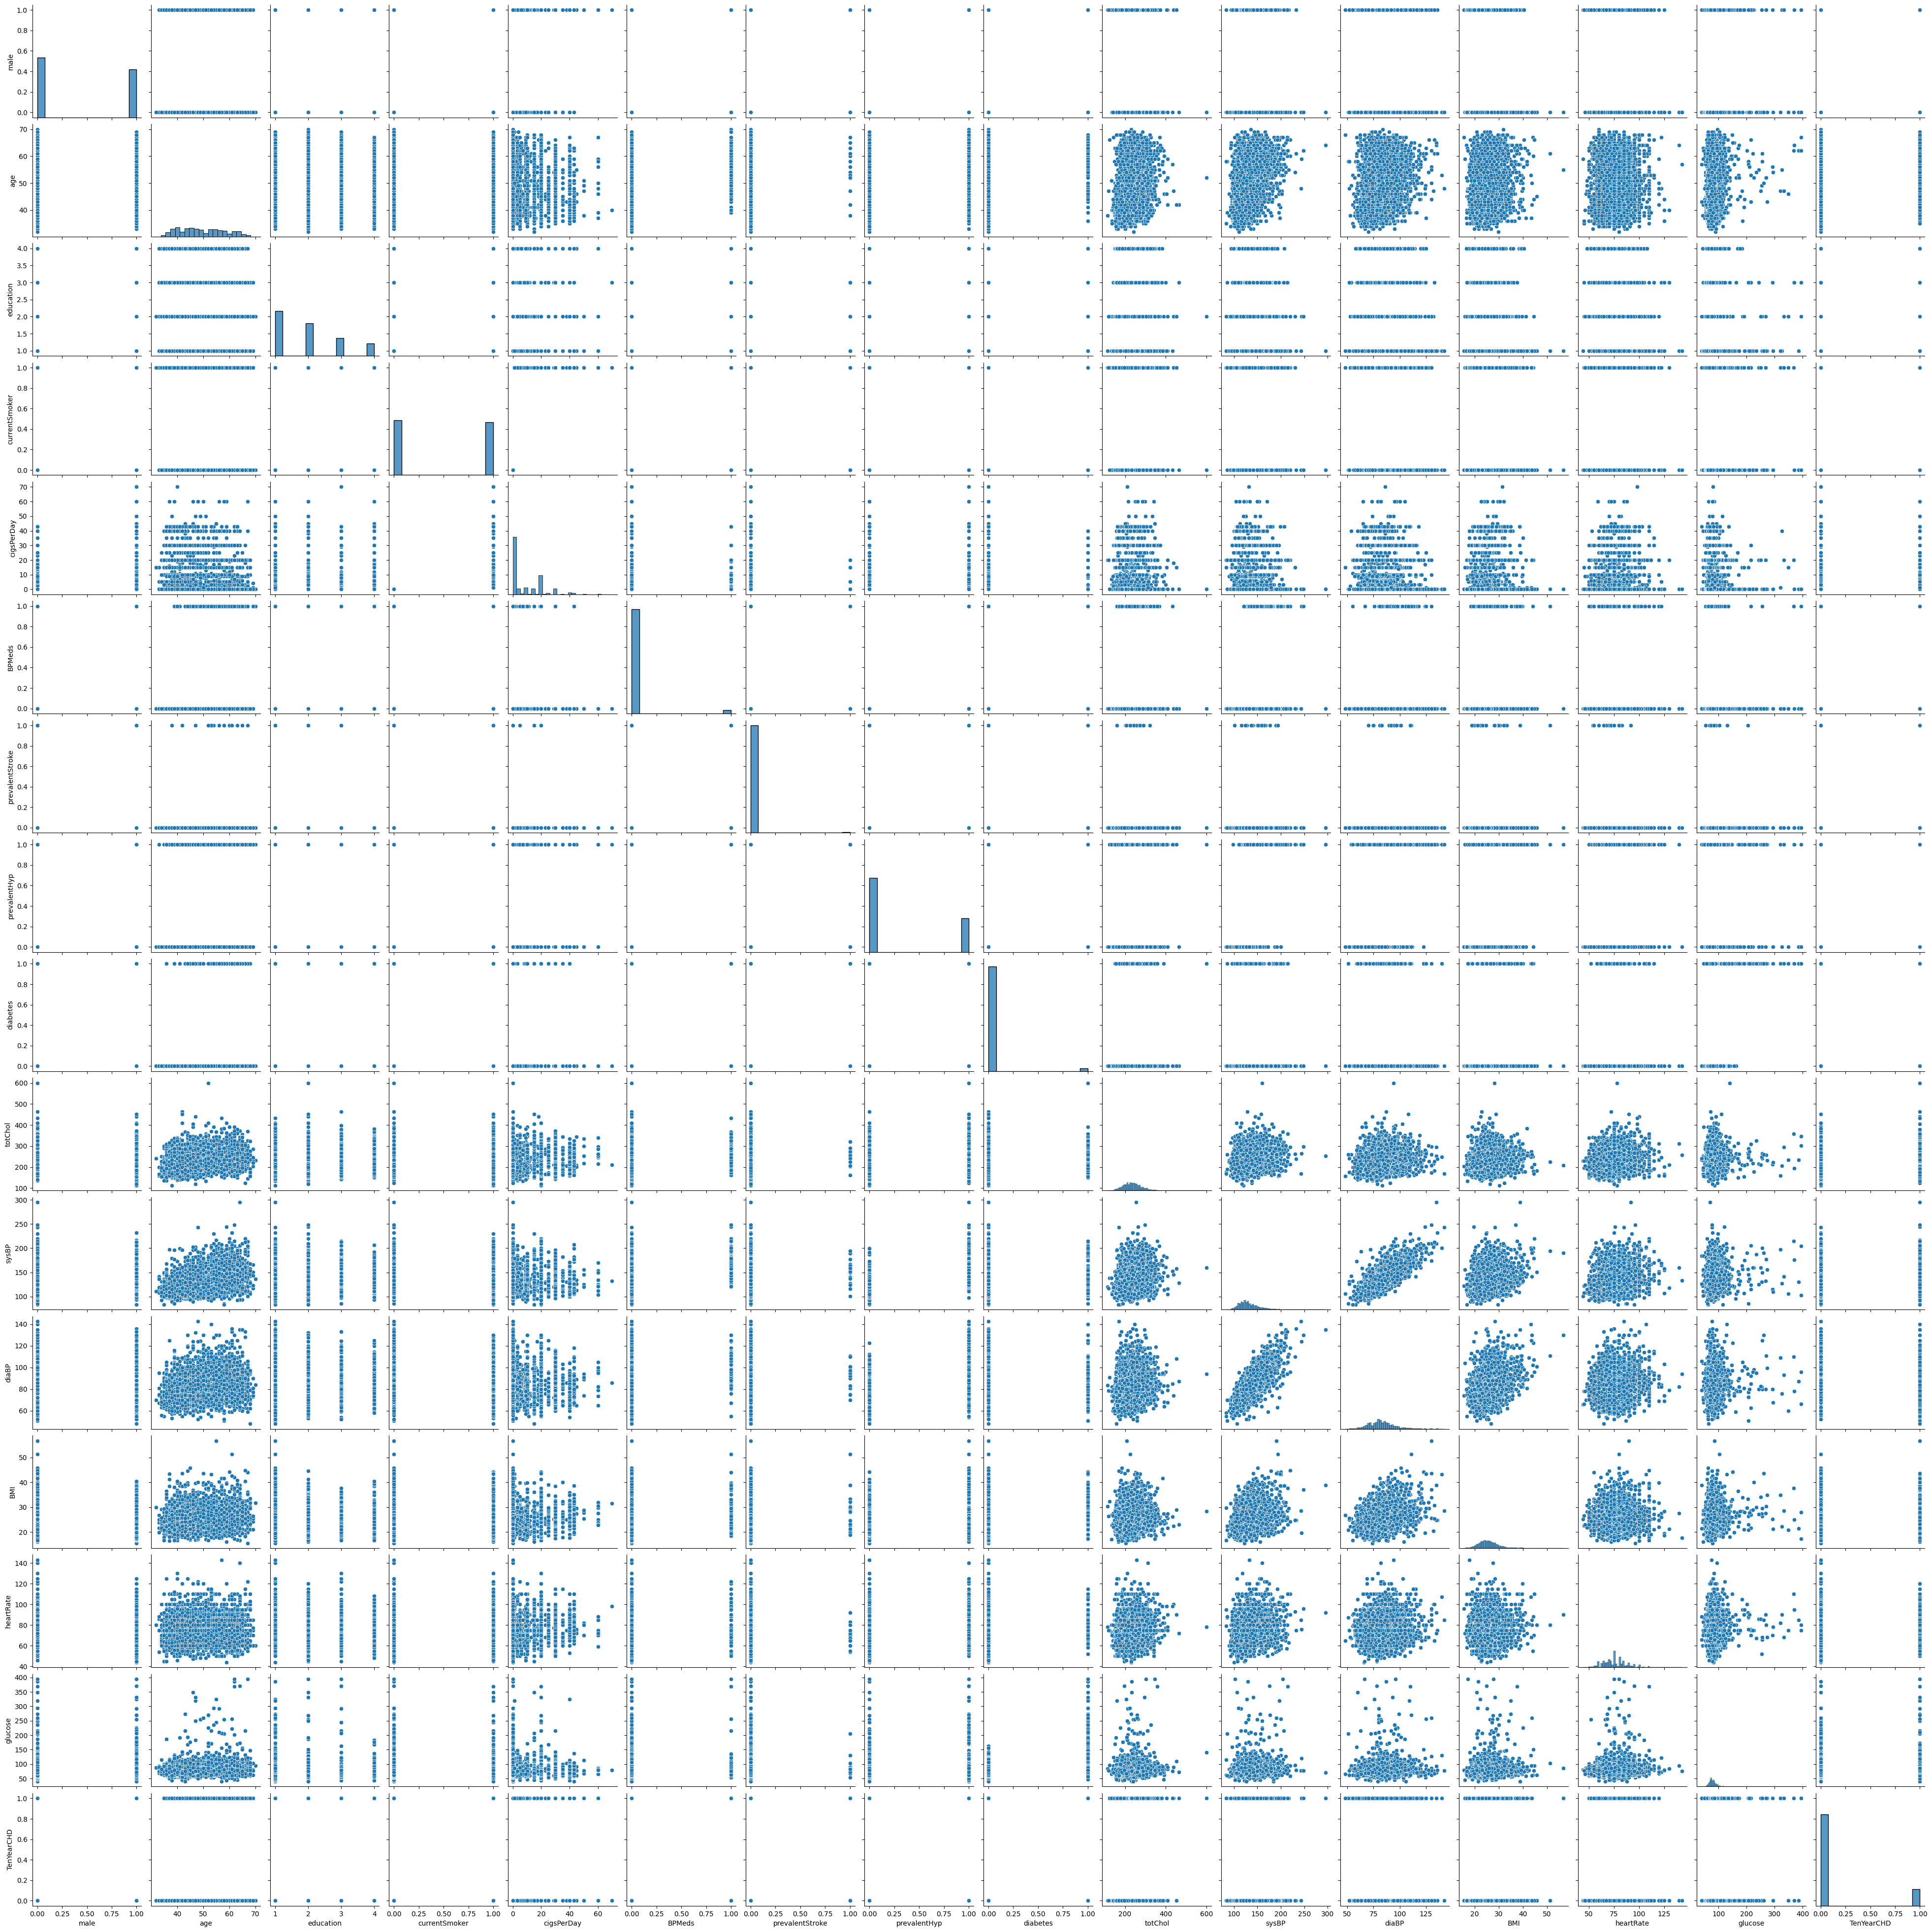

In [14]:
# Pairplot
sns.pairplot(df)
plt.show()

# Countplot of people based on their sex and whether they are Current Smoker or not

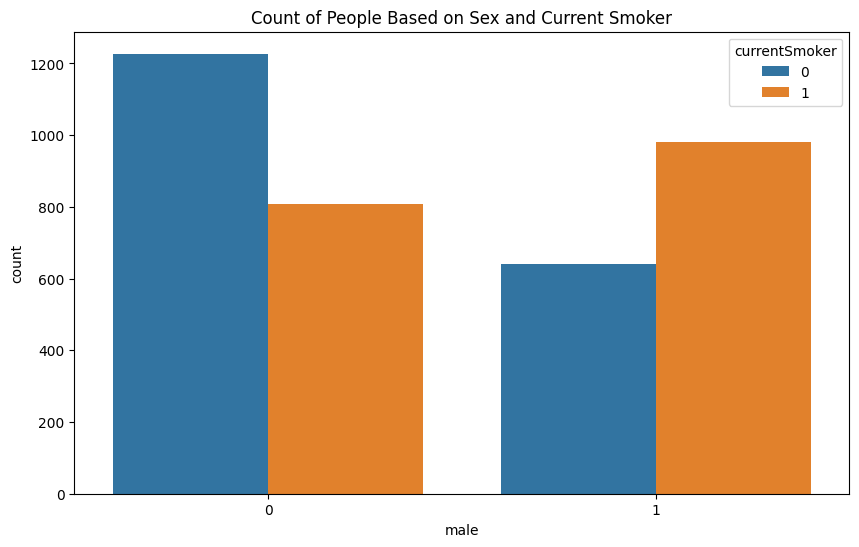

In [15]:
# Countplot of people based on their sex and whether they are Current Smoker or not
plt.figure(figsize=(10, 6))
sns.countplot(x='male', hue='currentSmoker', data=df)
plt.title('Count of People Based on Sex and Current Smoker')
plt.show()

# Countplot - subplots of No. of people affecting with CHD on basis of their sex and current smoking.

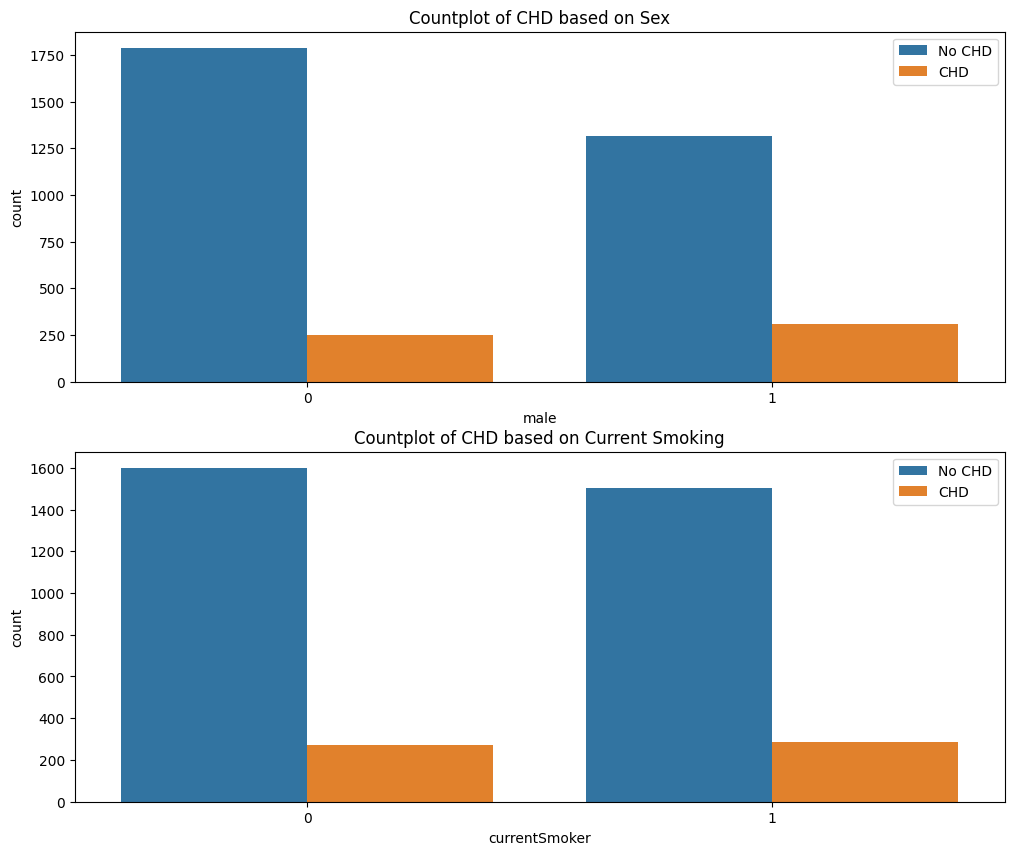

In [16]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.countplot(x="male", hue='TenYearCHD', data=df)
plt.legend(['No CHD', 'CHD'])
plt.title('Countplot of CHD based on Sex')

plt.subplot(2, 1, 2)
sns.countplot(x="currentSmoker", hue='TenYearCHD', data=df)
plt.legend(['No CHD', 'CHD'])
plt.title('Countplot of CHD based on Current Smoking')

plt.show()

# Machine Learning Part

# Separating the data into feature and target data.

In [17]:
X = df.loc[:, df.columns != 'TenYearCHD']
y = df['TenYearCHD']

# Importing the model and assigning the data for training and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Applying the ML model - Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

# Training the data

In [26]:
logmodel.fit(X_train, y_train)

c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Testing the data

In [21]:
y_pred = logmodel.predict(X_test)

# Predicting the score

In [22]:
print("Score:",logmodel.score(X_test, y_test))

Score: 0.8406193078324226


# Getting the Confusion Matrix and Classification Report

# Confusion Matrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
confMat= confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", confMat)
print(classification_report(y_test, y_pred))

Confusion matrix: 
 [[921   2]
 [173   2]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       923
           1       0.50      0.01      0.02       175

    accuracy                           0.84      1098
   macro avg       0.67      0.50      0.47      1098
weighted avg       0.79      0.84      0.77      1098



# Plotting the confusion matrix

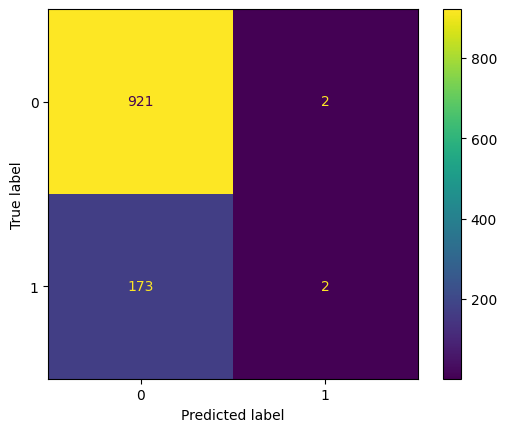

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confMat, display_labels=logmodel.classes_)
disp.plot()